In [1]:
import pandas as pd

# Load the dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\Timeseries\Timeseries\exchange_rate.csv"
exchange_rate_data = pd.read_csv(file_path)

exchange_rate_data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


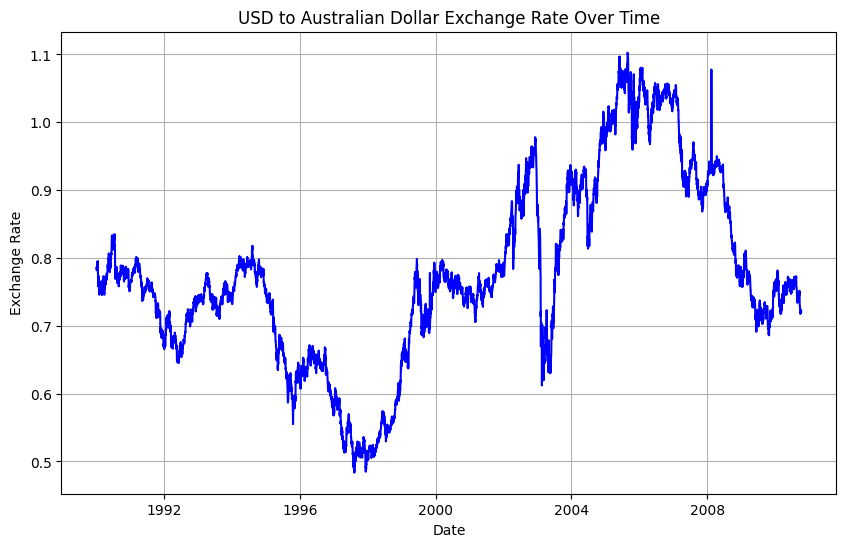

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


(None,
 Ex_rate    0
 dtype: int64)

In [2]:
# Convert the 'date' column to datetime and set it as the index
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'], format='%d-%m-%Y %H:%M')
exchange_rate_data.set_index('date', inplace=True)
# Plot the time series to visualize trends, seasonality, and anomalies

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(exchange_rate_data.index, exchange_rate_data['Ex_rate'], color='blue')
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# missing values
missing_values = exchange_rate_data.isnull().sum()

exchange_rate_data.info(), missing_values

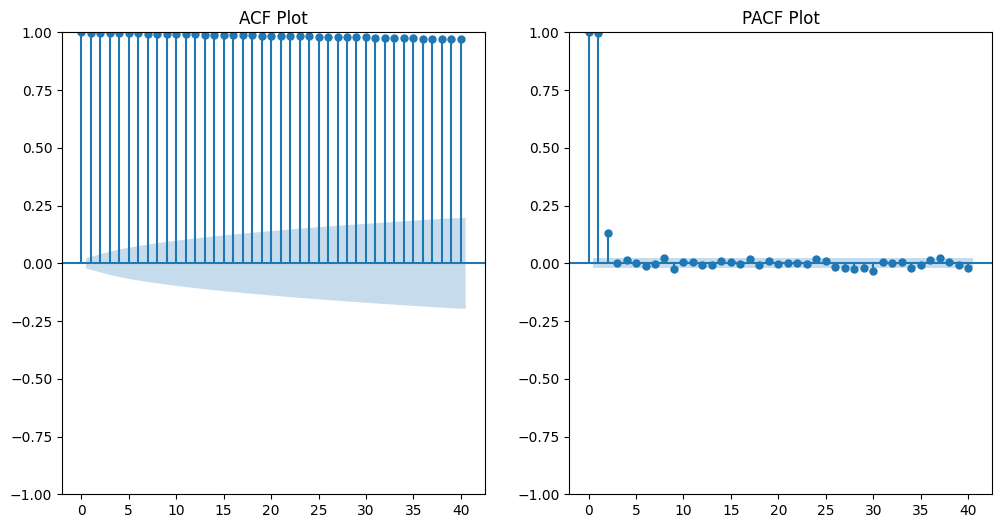

In [3]:
# ACF and PACF plots and ARIMA modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Plot ACF and PACF to estimate initial parameters for ARIMA model
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(exchange_rate_data['Ex_rate'], lags=40, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(exchange_rate_data['Ex_rate'], lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


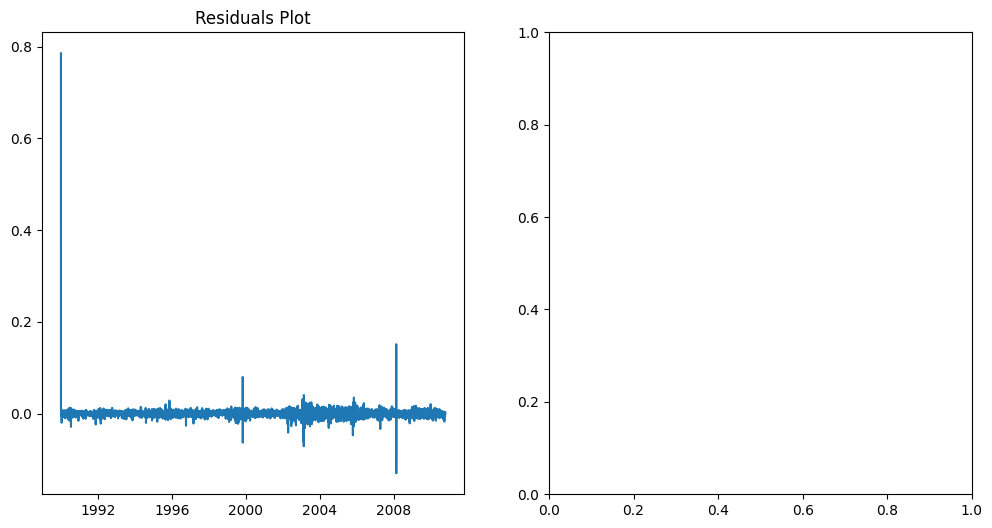

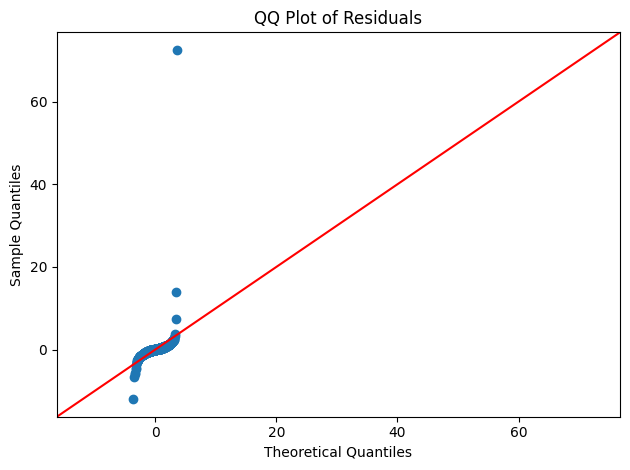

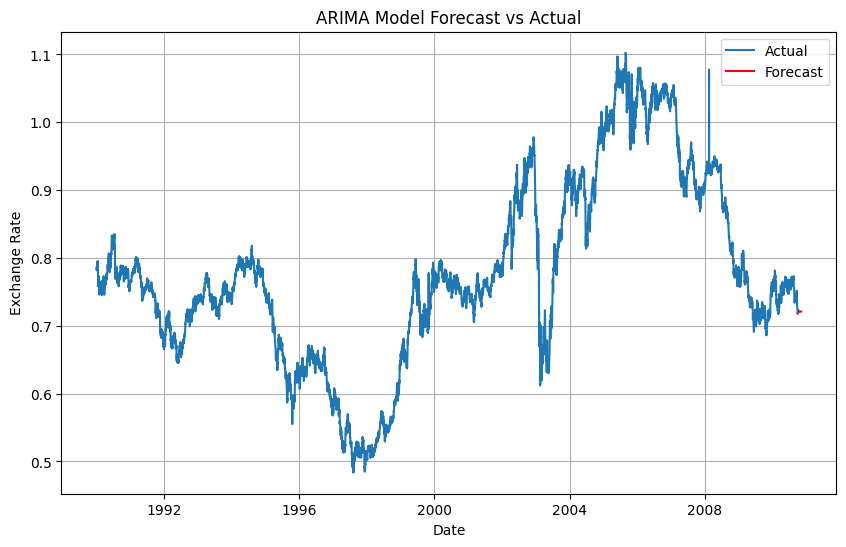

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 25 Sep 2024   AIC                         -56102.322
Time:                        15:57:11   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# Fit an ARIMA model with initial parameters (p=1, d=1, q=1)
arima_model = ARIMA(exchange_rate_data['Ex_rate'], order=(1, 1, 1))
arima_result = arima_model.fit()

# summary of the ARIMA model
arima_result_summary = arima_result.summary()
# Diagnostics - Plot the residuals
residuals = arima_result.resid
# Plotting residuals to check for patterns
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals Plot')

plt.subplot(122)
sm.qqplot(residuals, line ='45', fit=True)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# Forecasting out-of-sample for the next 30 days
forecast = arima_result.forecast(steps=30)
forecast_index = pd.date_range(start=exchange_rate_data.index[-1], periods=30, freq='D')
# Visualize the forecast
plt.figure(figsize=(10,6))
plt.plot(exchange_rate_data.index, exchange_rate_data['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

arima_result_summary

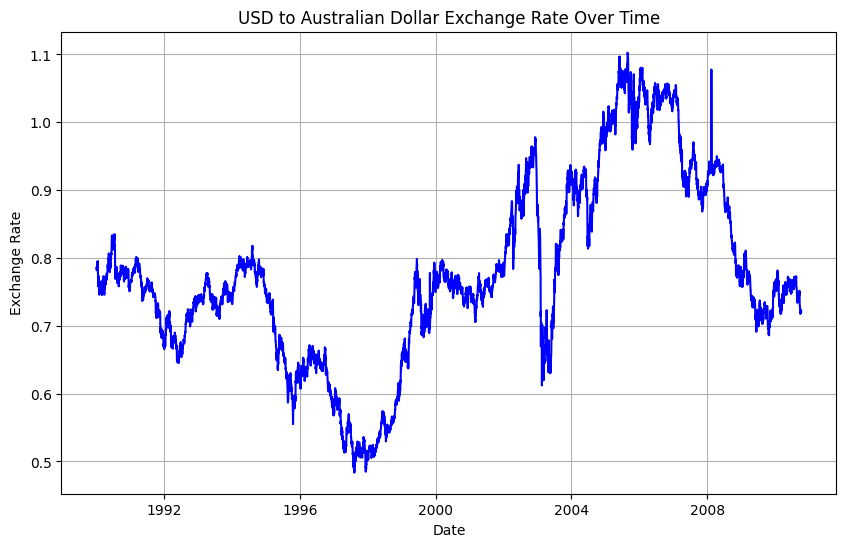

In [5]:
plt.figure(figsize=(10,6))
plt.plot(exchange_rate_data.index, exchange_rate_data['Ex_rate'], color='blue')
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


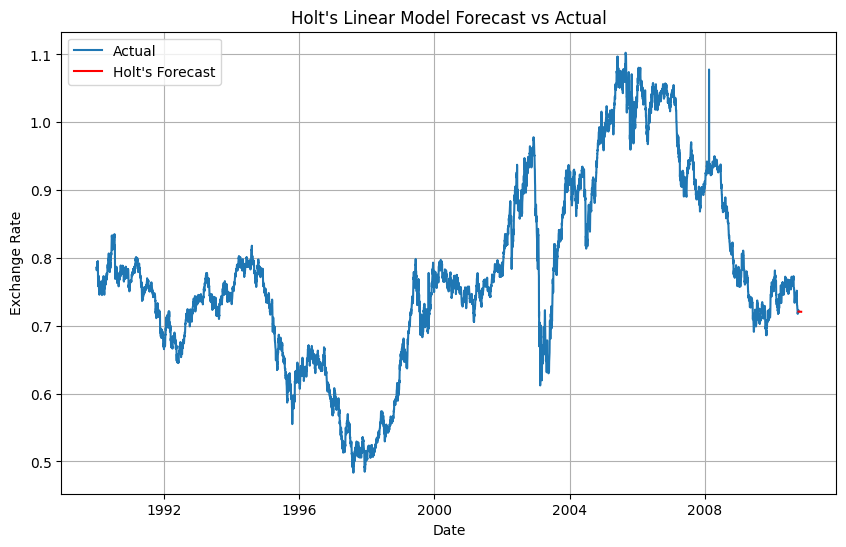

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77641.009
Trend:,Additive,BIC,-77613.272
Seasonal:,None,AICC,-77640.998
Seasonal Periods:,None,Date:,"Wed, 25 Sep 2024"
Box-Cox:,False,Time:,15:58:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700406,alpha,True
smoothing_trend,0.000000,beta,True


In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt Linear Trend Model with automatic parameter optimization
holt_model = ExponentialSmoothing(exchange_rate_data['Ex_rate'], trend="additive", seasonal=None).fit()
# Forecast for the next 30 days
holt_forecast = holt_model.forecast(steps=30)
forecast_index_holt = pd.date_range(start=exchange_rate_data.index[-1], periods=30, freq='D')
# Plot the forecast vs actual data
plt.figure(figsize=(10,6))
plt.plot(exchange_rate_data.index, exchange_rate_data['Ex_rate'], label='Actual')
plt.plot(forecast_index_holt, holt_forecast, label='Holt\'s Forecast', color='red')
plt.title('Holt\'s Linear Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

holt_model.summary()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# values for comparison (last 30 days of data)
actual_values = exchange_rate_data['Ex_rate'][-30:]
# Align ARIMA forecast for evaluation
arima_forecast_eval = arima_result.forecast(steps=30)[:len(actual_values)]
# Align Holt forecast for evaluation
holt_forecast_eval = holt_forecast[:len(actual_values)]
# error metrics for ARIMA
arima_mae = mean_absolute_error(actual_values, arima_forecast_eval)
arima_rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast_eval))
arima_mape = mean_absolute_percentage_error(actual_values, arima_forecast_eval)
# error metrics for Holt Linear Model
holt_mae = mean_absolute_error(actual_values, holt_forecast_eval)
holt_rmse = np.sqrt(mean_squared_error(actual_values, holt_forecast_eval))
holt_mape = mean_absolute_percentage_error(actual_values, holt_forecast_eval)
# Display results
error_metrics = pd.DataFrame({'Model': ['ARIMA', 'Holt'],'MAE': [arima_mae, holt_mae],'RMSE': [arima_rmse, holt_rmse],'MAPE': [arima_mape, holt_mape]})

error_metrics

,Model,MAE,RMSE,MAPE
0,ARIMA,0.012724,0.016983,NaN
1,Holt,0.012756,0.017005,NaN
